In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
media=pd.read_csv('mediacompany.csv')

In [12]:
media=media.drop('Unnamed: 7',axis=1)

In [14]:
media['Date']=pd.to_datetime(media['Date'])

In [15]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 80 non-null     datetime64[ns]
 1   Views_show           80 non-null     int64         
 2   Visitors             80 non-null     int64         
 3   Views_platform       80 non-null     int64         
 4   Ad_impression        80 non-null     int64         
 5   Cricket_match_india  80 non-null     int64         
 6   Character_A          80 non-null     int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 4.5 KB


In [61]:
from datetime import date
a=date(2017,2,28)
media['date_launched']=pd.to_datetime(media['date_launched'])

type(media['date_launched'])
media['days']=media['Date']-media['date_launched']
media.head()
media['days']=media['days'].astype(str)
media['days']=media['days'].apply(lambda x:x[:2])
media['days']=media['days'].astype(int)
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 80 non-null     datetime64[ns]
 1   Views_show           80 non-null     int64         
 2   Visitors             80 non-null     int64         
 3   Views_platform       80 non-null     int64         
 4   Ad_impression        80 non-null     int64         
 5   Cricket_match_india  80 non-null     int64         
 6   Character_A          80 non-null     int64         
 7   date_launched        80 non-null     datetime64[ns]
 8   days                 80 non-null     int32         
dtypes: datetime64[ns](2), int32(1), int64(6)
memory usage: 5.4 KB


In [62]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,date_launched,days
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2017-02-28,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2017-02-28,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,2017-02-28,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,2017-02-28,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,2017-02-28,5


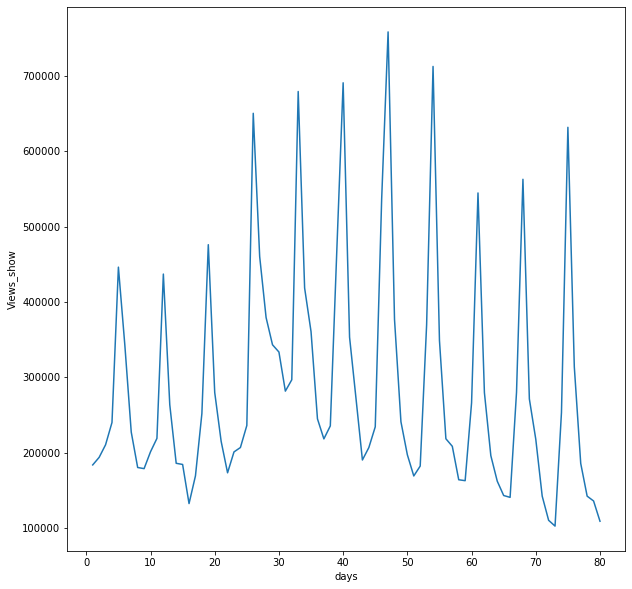

In [67]:
plt.figure(1,figsize=[10,10])
sns.lineplot(media['days'],media['Views_show'])

In [68]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,date_launched,days
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2017-02-28,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2017-02-28,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,2017-02-28,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,2017-02-28,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,2017-02-28,5


In [102]:

media['weekend']=np.where((media['days']%7 ==4)|(media['days']%7 ==5),'1','0')
media['weekend']=media['weekend'].astype('int64')

In [105]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,date_launched,days,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2017-02-28,1,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2017-02-28,2,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,2017-02-28,3,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,2017-02-28,4,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,2017-02-28,5,1


In [126]:
x=media[['Visitors','weekend']]
y=media['Views_show']

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [127]:
import statsmodels.api as sm
x= sm.add_constant(x)
lm1= sm.OLS(y,x).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           2.51e-12
Time:                        17:14:16   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.384   -2.89e+05    1.13e+05
Visitors       0.1934      0.061      3.160      0.002       0.071       0.315
weekend     1.807e+05   3.15e+04      5.740      0.000    1.18e+05    2.43e+05
==============================================================================
Omnibus:                        1.302   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                1.367
Skew:                           0.270   Prob(JB):                        0.505
Kurtosis:                       2.656   Cond. No.                     1.41e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Building model lm2 with "character a" column also included


In [128]:
x=media[['Visitors','weekend','Character_A']]
y=media['Views_show']

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)
import statsmodels.api as sm
x= sm.add_constant(x)
lm1= sm.OLS(y,x).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           1.53e-14
Time:                        17:19:05   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      0.613   -2.33e+05    1.38e+05
Visitors        0.1480      0.057      2.586      0.012       0.034       0.262
weekend      1.812e+05   2.89e+04      6.281      0.000    1.24e+05    2.39e+05
Character_A  9.542e+04   2.41e+04      3.963      0.000    4.75e+04    1.43e+05
==============================================================================
Omnibus:                        0.908   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.876
Skew:                          -0.009   Prob(JB):                        0.645
Kurtosis:                       2.488   Cond. No.                     1.42e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
x=media[['weekend','Character_A','Views_platform']]
y=media['Views_show']

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)
import statsmodels.api as sm
x= sm.add_constant(x)
lm1= sm.OLS(y,x).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           3.59e-15
Time:                        17:24:54   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.208      0.231   -3.19e+05    7.81e+04
weekend         1.781e+05   2.78e+04      6.410      0.000    1.23e+05    2.33e+05
Character_A     7.062e+04    2.6e+04      2.717      0.008    1.89e+04    1.22e+05
Views_platform     0.1507      0.048      3.152      0.002       0.055       0.246
==============================================================================
Omnibus:                        4.279   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                2.153
Skew:                           0.061   Prob(JB):                        0.341
Kurtosis:                       2.206   Cond. No.                     2.03e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
x=media[['weekend','Character_A','Visitors']]
y=media['Views_show']

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)
import statsmodels.api as sm
x= sm.add_constant(x)
lm1= sm.OLS(y,x).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           1.53e-14
Time:                        17:28:44   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      0.613   -2.33e+05    1.38e+05
weekend      1.812e+05   2.89e+04      6.281      0.000    1.24e+05    2.39e+05
Character_A  9.542e+04   2.41e+04      3.963      0.000    4.75e+04    1.43e+05
Visitors        0.1480      0.057      2.586      0.012       0.034       0.262
==============================================================================
Omnibus:                        0.908   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.876
Skew:                          -0.009   Prob(JB):                        0.645
Kurtosis:                       2.488   Cond. No.                     1.42e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""